# 1 Initilize dataframe

In [40]:
import pandas as pd
df = pd.read_csv("/home/durian/learning/IBM Data Science Professional Certificate/Tools-for-data-science/Exploratory_data_Analysis/data.csv")

## 1.1 Show snipets of dataframe

In [41]:
df.head(3)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350


In [42]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

# 2. Drop unnecessary columns

In [43]:
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'],axis= "columns")

# 3. Change columns names into meaningful names

In [44]:
df = df.rename(columns={"Engine HP": "HP",
                        "Engine Cylinders": "Cylinders",
                        "Transmission Type": "Transmission",
                        "Driven_Wheels": "Drive Mode",
                        "highway MPG": "MPG-H",
                        "city mpg": "MPG-C",
                        "MSRP": "Price"})

# 4. Delete duplicated rows

## 4.1 Show the duplicated rows

In [45]:
df_duplicated_rows = df[df.duplicated()] 
# Basic dataframe filtering
# using boolean dataframe expression
df_duplicated_rows.head(3)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
14,BMW,1 Series,2013,230.0,6.0,MANUAL,rear wheel drive,28,19,31500
18,Audi,100,1992,172.0,6.0,MANUAL,front wheel drive,24,17,2000
20,Audi,100,1992,172.0,6.0,MANUAL,front wheel drive,24,17,2000


## 4.2 Drop duplicated rows

In [46]:
df = df.drop_duplicates()
df.shape

(10925, 10)

# 5. Drop rows that have null values

## 5.1. Show rows that have null value

In [47]:
df_test = df.isnull()
df_test.head(4)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False


## 5.2 Drops null-contained rows 

In [48]:
df = df.dropna()
df.shape

(10827, 10)

# 6. Detecting Outliers

In [49]:
import seaborn as sns # visualization package

## 6.1.Visualize data using seaborn boxplot

<AxesSubplot:xlabel='MPG-C'>

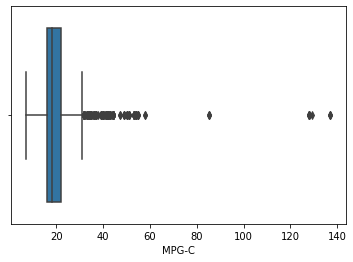

In [50]:
sns.boxplot(x=df["MPG-C"],whis=1.5)
#the dots outside of the line are outliers
# the whiskers is calculated using 1.5 times IQR

## 6.2 Get quantile using seaborn and dataframe


In [51]:
Q1 = df.quantile(0.25) #get the 0.25 of every columns
Q3 = df.quantile(0.75) #get the 0.75 of every columns
IQR = Q3-Q1 #calculate interquartile range
#we can substract 2 dataframes like 2 matrixes

## 6.3. create filter based on the quantiles

In [52]:
outliers = ((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)


/tmp/ipykernel_8919/2375537273.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)


In [53]:
df = df[~outliers]

In [54]:
df.shape

(9191, 10)

# 7. Plot different features 


## 7.1. against one another (scatter)

## 7.2. against frequency (histogram)